# Data Scientist Associate Practical Exam Submission

Use this template to complete your analysis and write up your summary for submission.


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [35]:
df = pd.read_csv('fitness_class_2212.csv')
df.head()

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0


## Task 1 

booking_id: 
a. Yes, it matches the description. 
b. No missing values.
c. No actions necessary.

months_as_member: 
a. Yes, it matches the description.
b. No missing values.
c. No actions necessary.

weight:
a. There are missing values so we need to be replace them with the overall average weight.
b. 20 missing values.
c. I replaced missing values with the overall average weight.

days_before:
a. The values need to be integers intead of objects. 
b. No missing values.
c. I removed 'days' and converted the column to integer type.

day_of_week:
a. The values should not include "Wednesday", "Monday", or "Fri.".
b. No missing values.
c. I changed any values with "Wednesday", "Monday", or "Fri." to "Wed", "Mon", and "Fri" respectively.

time:
a. Yes, it matches the description; however, some would argue "AM" and "PM" are not ordinal variables.
b. No missing values.
c. No actions necessary.

category:
a. Missing values should be replaced with "unknown" instead of "-".
b. No missing values.
c. I replaced any cells with "-" to "unknown"

attended:
a. Yes, it matches the description.
b. No missing values.
c. No actions necessary.

In [39]:
# Checking data and variables

print(df.info())

print('\n')

print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB
None


        booking_id  months_as_member       weight     attended
count  1500.000000       1500.000000  1480.000000  1500.000000
mean    750.500000         15.628667    82.610378     0.302667
std     433.157015         12.926543    12.765859     0.459565
min       1.000000          1.000000    55.410000     0.000000
25%     375.750000          8.000000   

In [40]:
# Checking missing values
df.isnull().sum()

booking_id           0
months_as_member     0
weight              20
days_before          0
day_of_week          0
time                 0
category             0
attended             0
dtype: int64

In [41]:
# Checking values
print(df['months_as_member'].unique())

print('\n')

print(df['day_of_week'].unique())

print('\n')

print(df['time'].unique())

print('\n')

print(df['attended'].unique())

[ 17  10  16   5  15   7  11   9  23  13   8  22   6  33  24  14   2  12
  26  28  27   1   3  21  18  19  53  20  34  25  32  73  55   4  35  54
  76  62  42 105  90  29  60  30 107  52  37  38  48  51  40  89  57  36
  44  39  41  47  58  66  45  43  61  50  65  31  97  59  93 148 111  69]


['Wed' 'Mon' 'Sun' 'Fri' 'Thu' 'Wednesday' 'Fri.' 'Tue' 'Sat' 'Monday']


['PM' 'AM']


[0 1]


In [42]:
# Fix weight

df.fillna(df['weight'].mean(), inplace=True)
df.isnull().sum()

booking_id          0
months_as_member    0
weight              0
days_before         0
day_of_week         0
time                0
category            0
attended            0
dtype: int64

In [43]:
# Fix days_before

df['days_before'] = df['days_before'].str.replace('days', '').astype(int)
print(df['days_before'].unique())

[ 8  2 14 10  6  4  9 12  5  3  7 13 20  1 15 11 16 17 29]


In [48]:
# Fix day_of_week

df['day_of_week'] = df['day_of_week'].replace({'Monday': 'Mon', 'Wednesday': 'Wed', 'Fri.' : 'Fri'})
print(df['day_of_week'].unique())

['Wed' 'Mon' 'Sun' 'Fri' 'Thu' 'Tue' 'Sat']


In [44]:
# Fix category

df['category'] = df['category'].replace('-', 'unknown')
print(df['category'].unique())

['Strength' 'HIIT' 'Cycling' 'Yoga' 'unknown' 'Aqua']


## Task 2
a. HIIT has the most oberservations. 
b. The observations are not balanced. HIIT has by far the most attendance followed by Cycling and Strenth.

<AxesSubplot: xlabel='category', ylabel='count'>

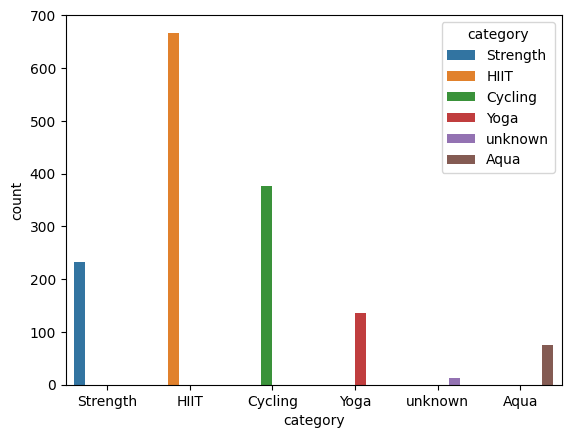

In [49]:
sns.countplot(x='category', hue='category',data=df)

## Task 3
The distirubtion is skewed right.

<AxesSubplot: xlabel='months_as_member', ylabel='Count'>

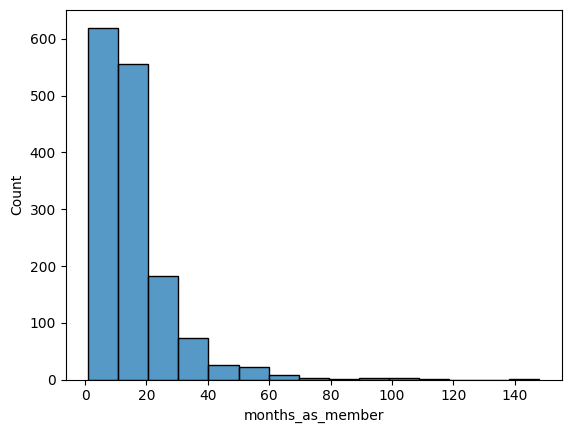

In [50]:
sns.histplot(x='months_as_member', data=df, bins=15)

## Task 4
Members who attended typically have more months as a member.

<AxesSubplot: xlabel='attended', ylabel='months_as_member'>

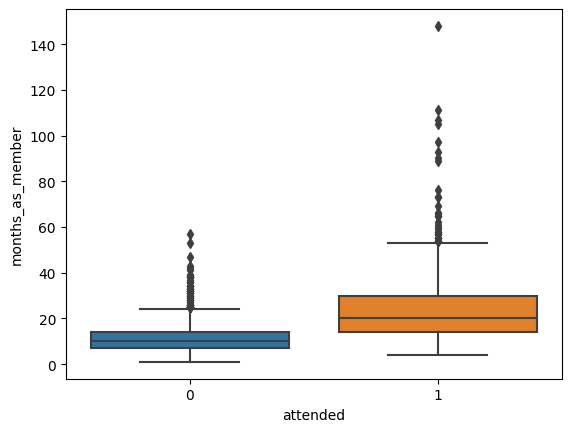

In [51]:
sns.boxplot(x='attended', y='months_as_member', data=df)

## Task 5
This is a binary classification machine learning problem.

## Task 6
See code below.

In [52]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split into train and test sets
df_train, df_test = train_test_split(df, test_size=0.33, random_state=42)

In [53]:
# Convert the categorical features in the train and test sets independently
df_train = pd.get_dummies(df_train)
df_test =  pd.get_dummies(df_test)

# Reindex the columns of the test set aligning with the train set
df_test = df_test.reindex(columns= df_train.columns, fill_value=0)

In [54]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Segregate features and labels into separate variables
X_train, y_train = df_train.iloc[:, :-1].values, df_train.iloc[:, [-1]].values
X_test, y_test = df_test.iloc[: , :-1].values, df_test.iloc[:, [-1]].values

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)

In [55]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

# Fit logreg to the train set
logreg.fit(rescaledX_train, y_train)

LogisticRegression()

In [56]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(rescaledX_test)

# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ", logreg.score(rescaledX_test, y_test))

# Print the confusion matrix of the logreg model
confusion_matrix(y_test, y_pred)

Accuracy of logistic regression classifier:  0.98989898989899


array([[490,   0],
       [  5,   0]])

In [57]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the grid of values for tol and max_iter
tol = [0.01, 0.001, 0.0001]
max_iter = [100, 150, 200]

# Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
param_grid = dict(tol=tol, max_iter=max_iter)

In [58]:
# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

# Fit grid_model to the data
grid_model_result = grid_model.fit(rescaledX_train, y_train)

# Summarize results
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

# Extract the best model and evaluate it on the test set
best_model = grid_model_result.best_estimator_
print("Accuracy of logistic regression classifier: ", best_model.score(rescaledX_test, y_test))

Best: 0.992040 using {'max_iter': 100, 'tol': 0.01}
Accuracy of logistic regression classifier:  0.98989898989899


## Task 7
See code below.

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# create a model
model_rf = RandomForestClassifier(random_state=42)

# train the model
model_rf.fit(X_train, y_train)

# make predictions
predictions_rf = model_rf.predict(X_test)

# print accuracy
print("Accuracy: ", accuracy_score(y_test, predictions_rf))

Accuracy:  0.98989898989899


## Task 8
Both Logistic Regression and Random Forest Classifier were chosen due to their widespread usage, versatility, and distinct advantages. Logistic Regression, a linear model, offers the benefit of interpretability through its coefficients, reflecting the influence of each feature on the log-odds of the positive class. Additionally, its simplicity and quick training process make it an efficient baseline model.

On the other hand, the Random Forest Classifier, an ensemble model, tends to perform exceptionally well on datasets with complex inter-feature relationships due to its inherent capability of handling non-linearity. Furthermore, it offers an intuitive measure of feature importance, enhancing our understanding of the model's decision-making process.

## Task 9
See code below.

In [60]:
# Logistic Regression:
best_model = grid_model_result.best_estimator_
print("Accuracy of logistic regression classifier: ", best_model.score(rescaledX_test, y_test))

Accuracy of logistic regression classifier:  0.98989898989899


In [61]:
# Random Forest:
print("Accuracy: ", accuracy_score(y_test, predictions_rf))

Accuracy:  0.98989898989899


## Task 10
The model comparison indicates that both the Logistic Regression and the Random Forest classifiers have performed equally well on the test dataset, as they both have an accuracy score of approximately 0.9899. Given these identical performance metrics, neither model can be said to perform "better" in terms of accuracy.

However, model selection isn't solely determined by accuracy; other factors, such as interpretability, computational efficiency, and the nature of the data, can also play a crucial role.

For instance, Logistic Regression, which is a simple and linear model, is easier to interpret and explain. It's especially useful when we care about understanding the impact of individual features on the predictions. On the other hand, the Random Forest model, a non-linear model, is more flexible and can handle complex relationships between features better.

## ✅  When you have finished...
- Publish your Workspace using the option on the left
- Check the published version of your report:
	- Can you see everything you want us to grade?
    - Are all the graphics visible?
- Review the grading rubric. Have you included everything that will be graded?
- Head back to the [Certification dashboard](https://app.datacamp.com/certification) to submit your practical exam